In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/evsales.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [4]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [5]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


In [7]:
print(df['region'].unique())

['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Romania' 'Seychelles'
 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkiye' 'United Arab Emirates' 'United Kingdom' 'USA']


In [8]:
print(df['category'].unique())

['Historical' 'Projection-STEPS' 'Projection-APS']


In [9]:
print(df['parameter'].unique())

['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']


In [10]:
print(df['powertrain'].unique())

['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']


In [11]:
print(df['year'].unique())

[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2010
 2025 2030 2035]


In [12]:
# Filter data for Australia
india_data = df[df['region'] == 'India']

# Display the first few rows of the filtered data
india_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
5399,India,Historical,EV sales,Cars,BEV,2010,Vehicles,450.000000
5400,India,Historical,EV stock,Cars,BEV,2010,Vehicles,880.000000
5401,India,Historical,EV sales share,Cars,EV,2010,percent,0.021000
5402,India,Historical,EV stock share,Cars,EV,2010,percent,0.005000
5403,India,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.000022


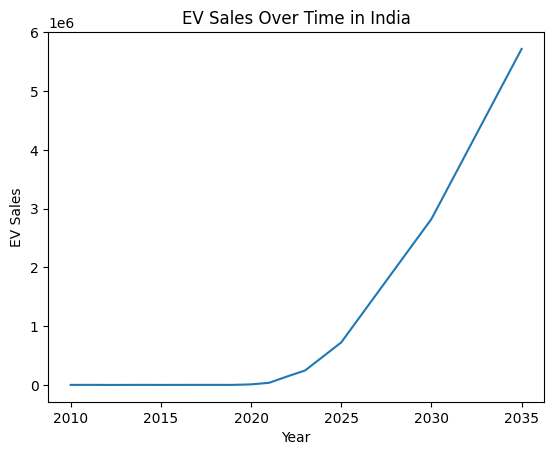

In [13]:
# Filter data for EV sales in Australia
india_ev_sales = india_data[(india_data['parameter'] == 'EV sales') & (india_data['mode'] == 'Cars')]

# Group by year and sum the sales
ev_sales_over_time = india_ev_sales.groupby('year')['value'].sum()

# Plot the EV sales over time
import matplotlib.pyplot as plt

ev_sales_over_time.plot(kind='line', title='EV Sales Over Time in India')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()

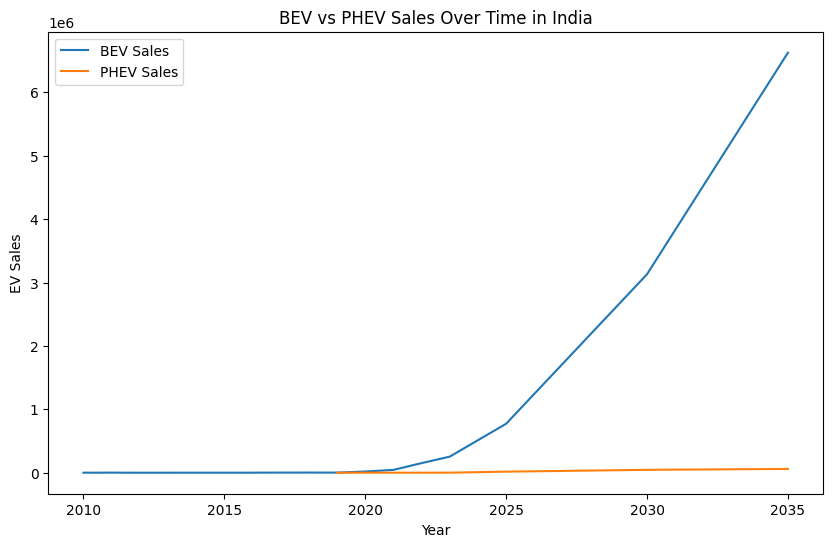

In [14]:
# Filter data for BEV and PHEV sales in India
bev_sales = india_data[(india_data['parameter'] == 'EV sales') & (india_data['powertrain'] == 'BEV')]
phev_sales = india_data[(india_data['parameter'] == 'EV sales') & (india_data['powertrain'] == 'PHEV')]

# Group by year and sum the sales
bev_sales_over_time = bev_sales.groupby('year')['value'].sum()
phev_sales_over_time = phev_sales.groupby('year')['value'].sum()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(bev_sales_over_time.index, bev_sales_over_time.values, label='BEV Sales')
plt.plot(phev_sales_over_time.index, phev_sales_over_time.values, label='PHEV Sales')
plt.title('BEV vs PHEV Sales Over Time in India')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend()
plt.show()

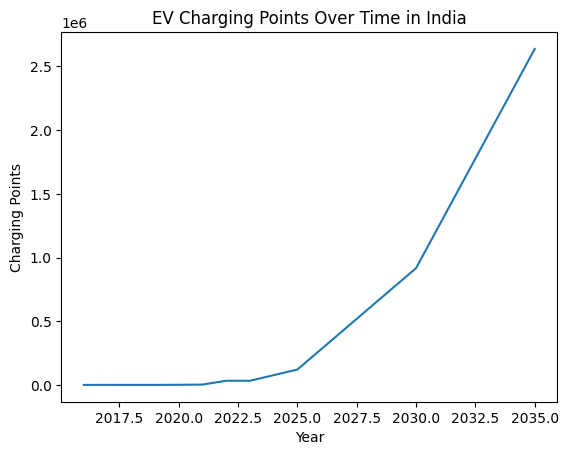

In [15]:
# Filter data for EV charging points in India
charging_points = india_data[india_data['parameter'] == 'EV charging points']

# Group by year and sum the charging points
charging_points_over_time = charging_points.groupby('year')['value'].sum()

# Plot the charging points over time
charging_points_over_time.plot(kind='line', title='EV Charging Points Over Time in India')
plt.xlabel('Year')
plt.ylabel('Charging Points')
plt.show()

In [25]:
# Filter data for Australia
china_data = df[df['region'] == 'China']

# Display the first few rows of the filtered data
china_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
1071,China,Historical,Electricity demand,Buses,EV,2010,GWh,150.0
1072,China,Historical,Electricity demand,Vans,EV,2010,GWh,3.0
1073,China,Historical,Electricity demand,Cars,EV,2010,GWh,46.0
1074,China,Historical,EV sales,Cars,BEV,2010,Vehicles,1100.0
1075,China,Historical,EV sales,Vans,BEV,2010,Vehicles,120.0


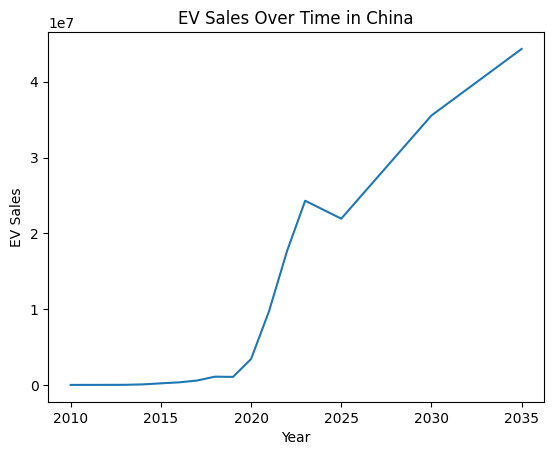

In [26]:
# Filter data for EV sales in Australia
china_ev_sales = china_data[(china_data['parameter'] == 'EV sales') & (china_data['mode'] == 'Cars')]

# Group by year and sum the sales
ev_sales_over_time = china_ev_sales.groupby('year')['value'].sum()

# Plot the EV sales over time
import matplotlib.pyplot as plt

ev_sales_over_time.plot(kind='line', title='EV Sales Over Time in China')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.show()

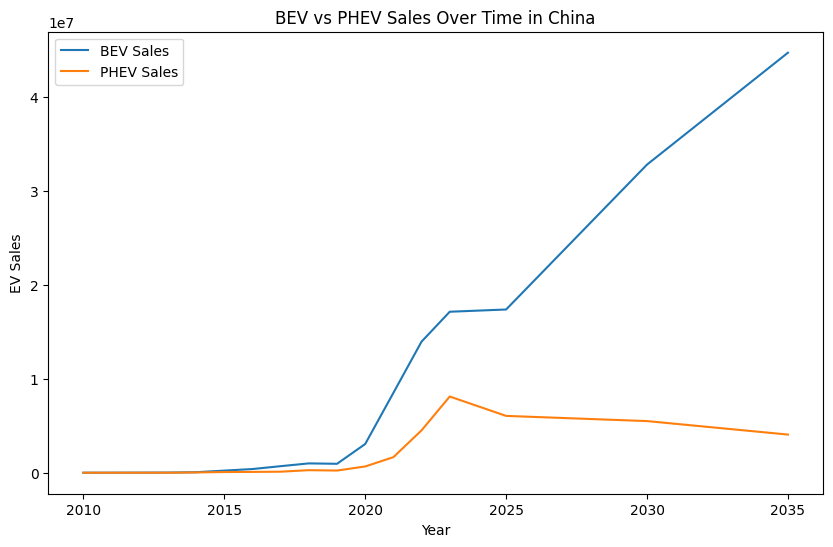

In [27]:
# Filter data for BEV and PHEV sales in Australia
bev_sales = china_data[(china_data['parameter'] == 'EV sales') & (china_data['powertrain'] == 'BEV')]
phev_sales = china_data[(china_data['parameter'] == 'EV sales') & (china_data['powertrain'] == 'PHEV')]

# Group by year and sum the sales
bev_sales_over_time = bev_sales.groupby('year')['value'].sum()
phev_sales_over_time = phev_sales.groupby('year')['value'].sum()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(bev_sales_over_time.index, bev_sales_over_time.values, label='BEV Sales')
plt.plot(phev_sales_over_time.index, phev_sales_over_time.values, label='PHEV Sales')
plt.title('BEV vs PHEV Sales Over Time in China')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend()
plt.show()

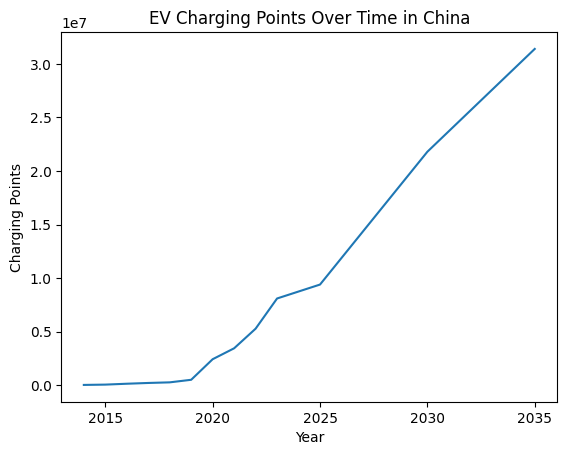

In [28]:
# Filter data for EV charging points in Australia
charging_points = china_data[china_data['parameter'] == 'EV charging points']

# Group by year and sum the charging points
charging_points_over_time = charging_points.groupby('year')['value'].sum()

# Plot the charging points over time
charging_points_over_time.plot(kind='line', title='EV Charging Points Over Time in China')
plt.xlabel('Year')
plt.ylabel('Charging Points')
plt.show()

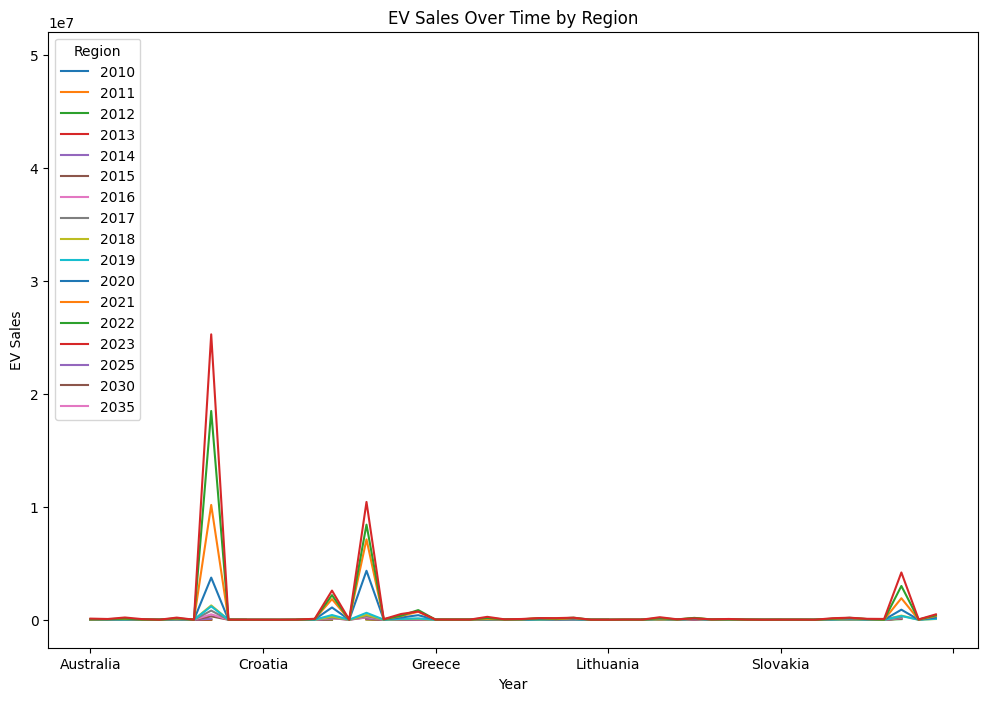

In [20]:
# EV sales
ev_sales = df[df['parameter'] == 'EV sales']

# Group by region and year, then sum the sales
ev_sales_by_region = ev_sales.groupby(['region', 'year'])['value'].sum().unstack()

# The comparison
ev_sales_by_region.plot(kind='line', figsize=(12, 8), title='EV Sales Over Time by Region')
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.legend(title='Region')
plt.show()

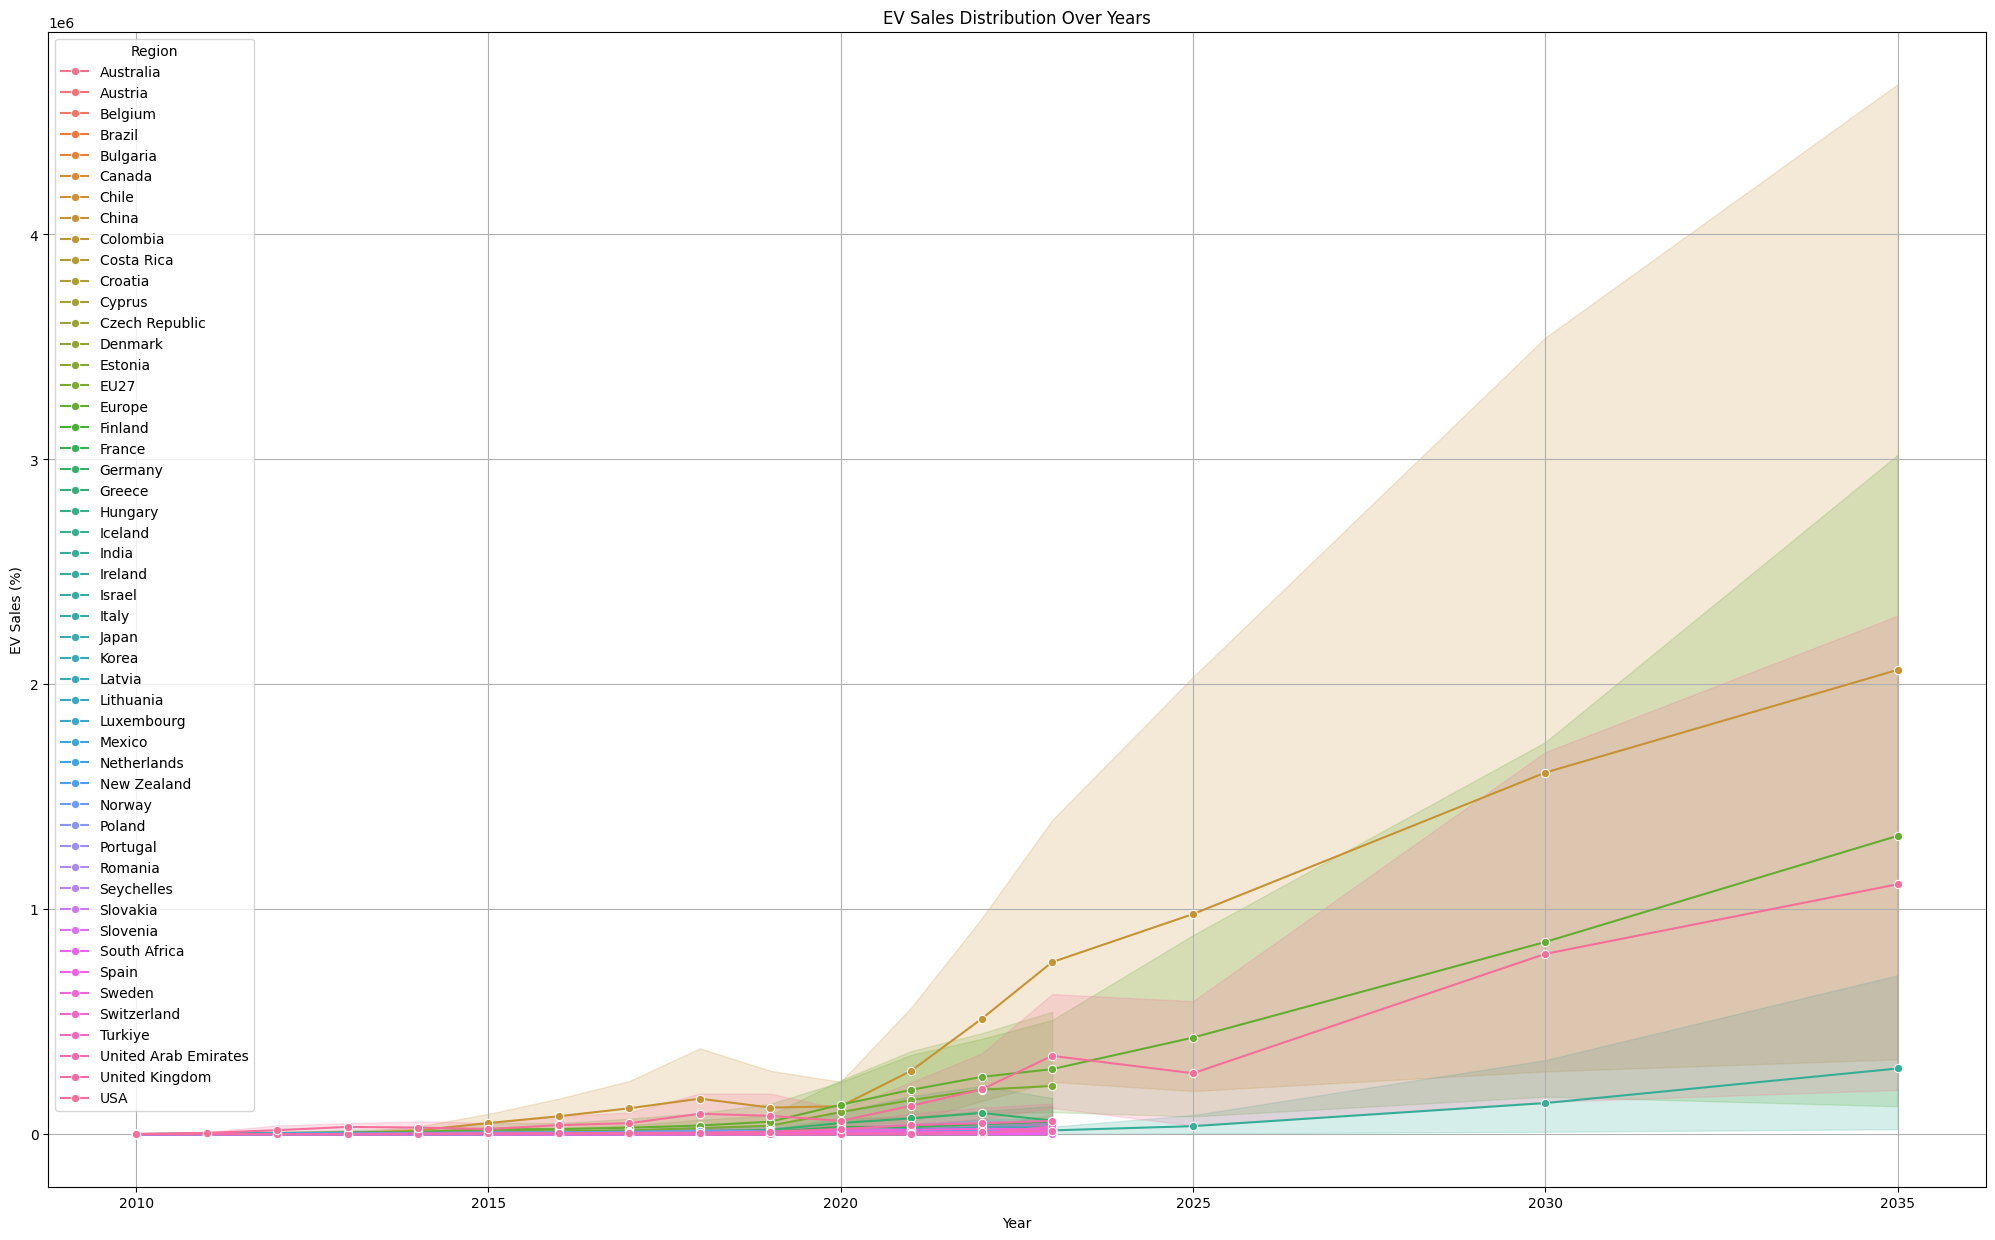

In [31]:
# EV stock share
ev_stock_share = df[df['parameter'] == 'EV sales']

# distribution of EV stock share over the years
plt.figure(figsize=(25, 15))
sns.lineplot(data=ev_stock_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()


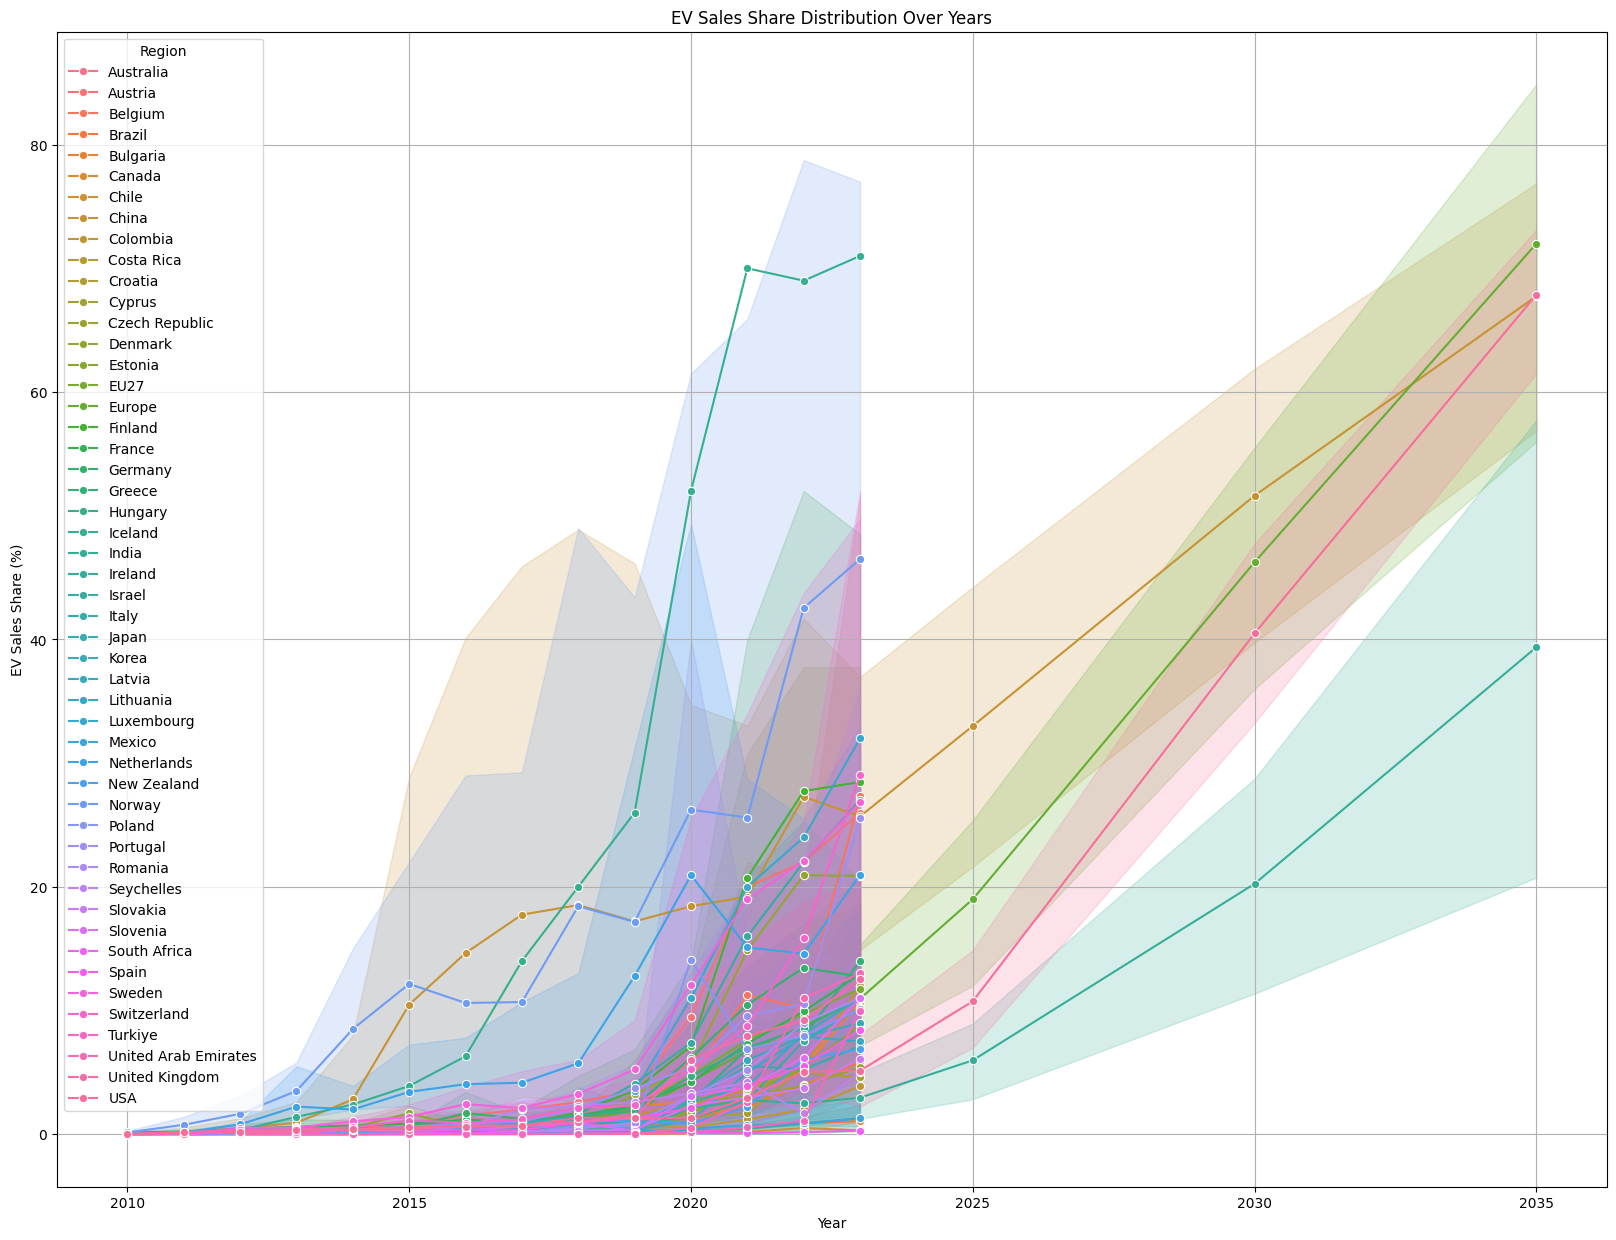

In [22]:
# EV sales share
ev_sales_share = df[df['parameter'] == 'EV sales share']

# distribution of EV sales share over the years
plt.figure(figsize=(20, 15))
sns.lineplot(data=ev_sales_share, x='year', y='value', hue='region', marker='o')
plt.title('EV Sales Share Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('EV Sales Share (%)')
plt.legend(title='Region')
plt.grid(True)
plt.show()

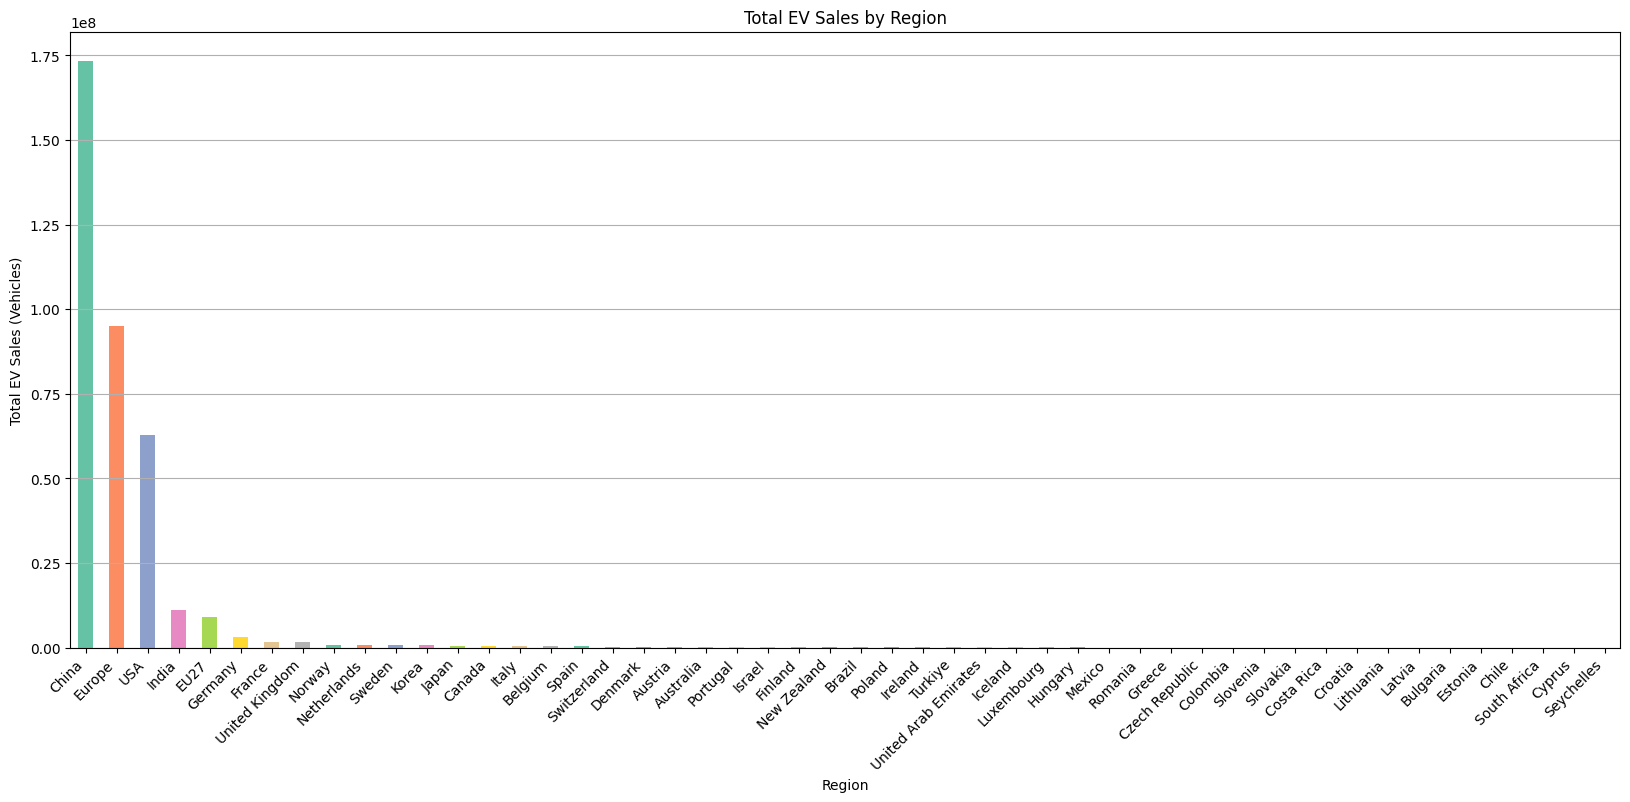

In [23]:
# Filter data for total EV sales
ev_sales = df[df['parameter'] == 'EV sales']

# Aggregate total EV sales by region
total_ev_sales_by_region = ev_sales.groupby('region')['value'].sum().sort_values(ascending=False)

# Total EV sales by region
plt.figure(figsize=(20, 8))
total_ev_sales_by_region.plot(kind='bar', color=plt.get_cmap('Set2').colors)
plt.title('Total EV Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total EV Sales (Vehicles)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()